<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/CP1_Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Computer Project 1 <h1>
<h2> Mehrdad Zomorodiyan <h2>

<h1> Problem 5 <h1>

There's a problem with running these codes just after the last 4 problem of computer project 1 in colab so I made a seperate file which works fine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title define lorenz 4th order runge kutta
def lorenzRK4(x, y, z, lent, h, sigma, b, r):
    cte = 1/6 
    for i in range(lent-1):
        xt, yt, zt = x[i], y[i], z[i]
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k1x = h * fx
        k1y = h * fy
        k1z = h * fz
        xt, yt, zt = x[i]+0.5*k1x, y[i]+0.5*k1y, z[i]+0.5*k1z
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k2x = h * fx
        k2y = h * fy
        k2z = h * fz
        xt, yt, zt = x[i]+0.5*k2x, y[i]+0.5*k2y, z[i]+0.5*k2z
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k3x = h * fx
        k3y = h * fy
        k3z = h * fz
        xt, yt, zt = x[i]+k3x, y[i]+k3y, z[i]+k3z
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k4x = h * fx
        k4y = h * fy
        k4z = h * fz
        x[i+1] = x[i] + cte*k1x + 2*cte*(k2x+k3x) + cte*k4x
        y[i+1] = y[i] + cte*k1y + 2*cte*(k2y+k3y) + cte*k4y
        z[i+1] = z[i] + cte*k1z + 2*cte*(k2z+k3z) + cte*k4z

    return x, y, z

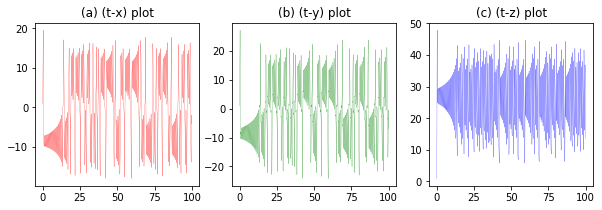

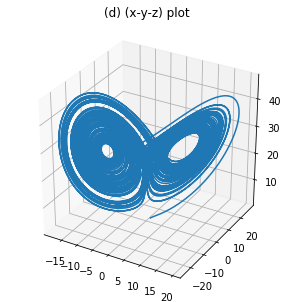

In [6]:
#@title part (i)
tl = 0; tr = 100.001; sigma = 10.0
b = 8/3; r = 28.0
x0, y0, z0 = 1.0, 1.0, 1.0
h = 0.001
t = np.arange(tl, tr, h)
lent = len(t)
x, y, z = map(np.zeros, ((lent), (lent), (lent)))
x[0], y[0], z[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzRK4(x, y, z, lent, h, sigma, b, r)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
ax1.plot(t, xRK4,color='r',linewidth=0.2)
ax1.title.set_text('(a) (t-x) plot')
ax2.plot(t, yRK4,color='g',linewidth=0.2)
ax2.title.set_text('(b) (t-y) plot')
ax3.plot(t, zRK4,color='b',linewidth=0.2)
ax3.title.set_text('(c) (t-z) plot')

fig = plt.figure(15)
fig.set_size_inches(5, 5)
ax = plt.axes(projection='3d')
ax.plot3D(xRK4, yRK4, zRK4)
ax.title.set_text('(d) (x-y-z) plot')

In [8]:
#@title define lorenz Euler forward scheme method
def lorenzEuler(x, y, z, lent, h, sigma, b, r):
    for i in range(lent-1):
        x[i+1] = h * fx(sigma, x[i], y[i]) + x[i]
        y[i+1] = h * fy(r, x[i], y[i], z[i]) + y[i]
        z[i+1] = h * fz(b, x[i], y[i], z[i]) + z[i]
    return x, y, z


Euler (err_x, err_y, err_z) =  0.614059494072403 0.10916967474166009 0.3131732305849844


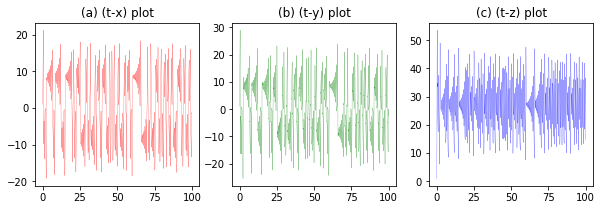

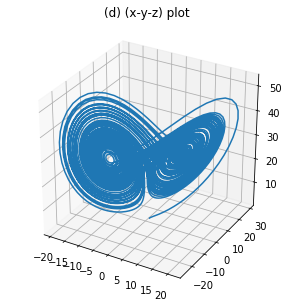

In [20]:
#@title part (ii)
tl = 0; tr = 100.001; sigma = 10.0
b = 8/3; r = 28.0
x0, y0, z0 = 1.0, 1.0, 1.0
h = 0.01
t = np.arange(tl, tr, h)
lent = len(t)
x, y, z = map(np.zeros, ((lent), (lent), (lent)))
x[0], y[0], z[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzEuler(x, y, z, lent, h, sigma, b, r)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
ax1.plot(t, xRK4,color='r',linewidth=0.2)
ax1.title.set_text('(a) (t-x) plot')
ax2.plot(t, yRK4,color='g',linewidth=0.2)
ax2.title.set_text('(b) (t-y) plot')
ax3.plot(t, zRK4,color='b',linewidth=0.2)
ax3.title.set_text('(c) (t-z) plot')

fig = plt.figure(15)
fig.set_size_inches(5, 5)
ax = plt.axes(projection='3d')
ax.plot3D(xRK4, yRK4, zRK4)
ax.title.set_text('(d) (x-y-z) plot')

xRK4, yRK4, zRK4 = map(np.zeros, ((lent), (lent), (lent)))
xRK4[0], yRK4[0], zRK4[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzRK4(xRK4, yRK4, zRK4, lent, h, sigma, b, r)
xEu, yEu, zEu = map(np.zeros, ((lent), (lent), (lent)))
xEu[0], yEu[0], zEu[0] = x0, y0, z0
xEu, yEu, zEu = lorenzEuler(xEu, yEu, zEu, lent, h, sigma, b, r)
errEuX = np.abs((xRK4[-1]-xEu[-1])/xRK4[-1])
errEuY = np.abs((yRK4[-1]-yEu[-1])/yRK4[-1])
errEuZ = np.abs((zRK4[-1]-zEu[-1])/zRK4[-1])
print('Euler (err_x, err_y, err_z) = ',errEuX, errEuY, errEuZ)

In [18]:
#@title define lorenz solved by second order runge kutta method
def lorenzRK2(x, y, z, lent, h, sigma, b, r):
    '''     second-order Runge–Kutta       '''
    beta = 0.5
    gamma2 = 0.5 / beta
    gamma1 = 1 - gamma2
    for i in range(lent-1):
        xt, yt, zt = x[i], y[i], z[i]
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k1x = h * fx
        k1y = h * fy
        k1z = h * fz
        xt, yt, zt = x[i]+beta*k1x, y[i]+beta*k1y, z[i]+beta*k1z
        fx = sigma * (yt-xt)
        fy = r * xt - yt - xt * zt
        fz = xt * yt - b * zt
        k2x = h * fx
        k2y = h * fy
        k2z = h * fz
        x[i+1] = x[i] + gamma1*k1x + gamma2*k2x
        y[i+1] = y[i] + gamma1*k1y + gamma2*k2y
        z[i+1] = z[i] + gamma1*k1z + gamma2*k2z

    return x, y, z

RK2 (err_x, err_y, err_z) =  2.028102974390668 0.7512218048061935 0.10324970856478337


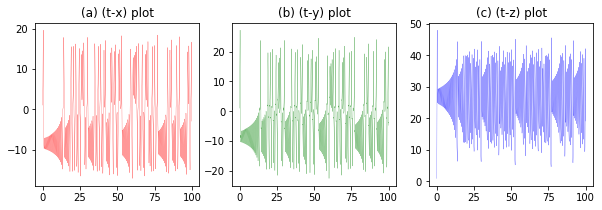

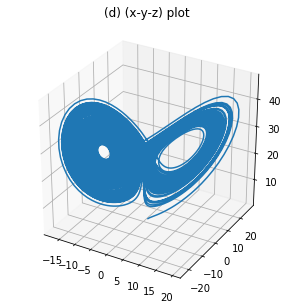

In [26]:
#@title part (iii)
tl = 0; tr = 100.001; sigma = 10.0
b = 8/3; r = 28.0
x0, y0, z0 = 1.0, 1.0, 1.0
h = 0.01
t = np.arange(tl, tr, h)
lent = len(t)
x, y, z = map(np.zeros, ((lent), (lent), (lent)))
x[0], y[0], z[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzRK2(x, y, z, lent, h, sigma, b, r)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
ax1.plot(t, xRK4,color='r',linewidth=0.2)
ax1.title.set_text('(a) (t-x) plot')
ax2.plot(t, yRK4,color='g',linewidth=0.2)
ax2.title.set_text('(b) (t-y) plot')
ax3.plot(t, zRK4,color='b',linewidth=0.2)
ax3.title.set_text('(c) (t-z) plot')

fig = plt.figure(15)
fig.set_size_inches(5, 5)
ax = plt.axes(projection='3d')
ax.plot3D(xRK4, yRK4, zRK4)
ax.title.set_text('(d) (x-y-z) plot')

xRK4, yRK4, zRK4 = map(np.zeros, ((lent), (lent), (lent)))
xRK4[0], yRK4[0], zRK4[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzRK4(xRK4, yRK4, zRK4, lent, h, sigma, b, r)
xEu, yEu, zEu = map(np.zeros, ((lent), (lent), (lent)))
xEu[0], yEu[0], zEu[0] = x0, y0, z0
xEu, yEu, zEu = lorenzRK2(xEu, yEu, zEu, lent, h, sigma, b, r)
errEuX = np.abs((xRK4[-1]-xEu[-1])/xRK4[-1])
errEuY = np.abs((yRK4[-1]-yEu[-1])/yRK4[-1])
errEuZ = np.abs((zRK4[-1]-zEu[-1])/zRK4[-1])
print('RK2 (err_x, err_y, err_z) = ',errEuX, errEuY, errEuZ)

In [12]:
#@title define Lorenz leapfrog initiating with first order Euler
def lorenzEulerInit(x, y, z, h, sigma, b, r):
    i = 0
    x[i+1] = h * fx(sigma, x[i], y[i]) + x[i]
    y[i+1] = h * fy(r, x[i], y[i], z[i]) + y[i]
    z[i+1] = h * fz(b, x[i], y[i], z[i]) + z[i]
    return x, y, z

def lorenzLeapfrog(x, y, z, lent, h, sigma, b, r):
    x, y, z = lorenzEulerInit(x, y, z, h, sigma, b, r)
    for i in range(1, lent-1):
        x[i+1] = 2 * h * fx(sigma, x[i], y[i]) + x[i-1]
        y[i+1] = 2 * h * fy(r, x[i], y[i], z[i]) + y[i-1]
        z[i+1] = 2 * h * fz(b, x[i], y[i], z[i]) + z[i-1]
    return x, y, z


In [23]:
#@title part (iv); my results diverge for leapfrog case (not sure why)
tl = 0; tr = 50.001; sigma = 10.0
b = 8/3; r = 28.0
x0, y0, z0 = 1.0, 1.0, 1.0
h = 0.001
t = np.arange(tl, tr, h)
lent = len(t)
x, y, z = map(np.zeros, ((lent), (lent), (lent)))
x[0], y[0], z[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzLeapfrog(x, y, z, lent, h, sigma, b, r)

'''
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 3)
ax1.plot(t[:-20], xRK4[:-20],color='r',linewidth=0.2)
ax1.title.set_text('(a) (t-x) plot')
ax2.plot(t, yRK4,color='g',linewidth=0.2)
ax2.title.set_text('(b) (t-y) plot')
ax3.plot(t, zRK4,color='b',linewidth=0.2)
ax3.title.set_text('(c) (t-z) plot')

fig = plt.figure(15)
fig.set_size_inches(5, 5)
ax = plt.axes(projection='3d')
ax.plot3D(xRK4, yRK4, zRK4)
ax.title.set_text('(d) (x-y-z) plot')
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars


"\nfig, (ax1,ax2,ax3) = plt.subplots(1, 3)\nfig.set_size_inches(10, 3)\nax1.plot(t[:-20], xRK4[:-20],color='r',linewidth=0.2)\nax1.title.set_text('(a) (t-x) plot')\nax2.plot(t, yRK4,color='g',linewidth=0.2)\nax2.title.set_text('(b) (t-y) plot')\nax3.plot(t, zRK4,color='b',linewidth=0.2)\nax3.title.set_text('(c) (t-z) plot')\n\nfig = plt.figure(15)\nfig.set_size_inches(5, 5)\nax = plt.axes(projection='3d')\nax.plot3D(xRK4, yRK4, zRK4)\nax.title.set_text('(d) (x-y-z) plot')\n"

In [24]:
#@title part(v) none of the method run smoothly with h=0.1, maybe it is too small
h = 0.1
t = np.arange(tl, tr, h)
lent = len(t)

xRK4, yRK4, zRK4 = map(np.zeros, ((lent), (lent), (lent)))
xRK4[0], yRK4[0], zRK4[0] = x0, y0, z0
xRK4, yRK4, zRK4 = lorenzRK4(xRK4, yRK4, zRK4, lent, h, sigma, b, r)
xEu, yEu, zEu = map(np.zeros, ((lent), (lent), (lent)))
xEu[0], yEu[0], zEu[0] = x0, y0, z0
xEu, yEu, zEu = lorenzEuler(xEu, yEu, zEu, lent, h, sigma, b, r)
xRK2, yRK2, zRK2 = map(np.zeros, ((lent), (lent), (lent)))
xRK2[0], yRK2[0], zRK2[0] = x0, y0, z0
xRK2, yRK2, zRK2 = lorenzRK2(xRK2, yRK2, zRK2, lent, h, sigma, b, r)

errEuX = np.abs((xRK4[-1]-xEu[-1])/xRK4[-1])
errEuY = np.abs((yRK4[-1]-yEu[-1])/yRK4[-1])
errEuZ = np.abs((zRK4[-1]-zEu[-1])/zRK4[-1])
print('Euler (err_x, err_y, err_z) = ',errEuX, errEuY, errEuZ)
errRK2X = np.abs((xRK4[-1]-xRK2[-1])/xRK4[-1])
errRK2Y = np.abs((yRK4[-1]-yRK2[-1])/yRK4[-1])
errRK2Z = np.abs((zRK4[-1]-zRK2[-1])/zRK4[-1])
print('RK2 (err_x, err_y, err_z) = ',errRK2X, errRK2Y, errRK2Z)


Euler (err_x, err_y, err_z) =  nan nan nan
RK2 (err_x, err_y, err_z) =  nan nan nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dis